# Session 1 - Curve Fitting - 19024750

We will be testing fits to both a 1st and 3rd order true polynomial with noise, eventually training a 1st, 3rd, and 7th order polynomial to fit the latter. This code will utilise a stochastic gradient descent algorithm in order to fit the curve sufficiently. 

Importing the necessary modules and defining the defaults for plots:

## (Parts of this code are from Ryan Nichol - PHAS0056: Week1_CurveFitting.ipynb)

In [1]:
# From numpy import array, zeros, exp, random, dot, shape, reshape, meshgrid, 
# linspace

import numpy as np

# For plotting

import matplotlib.pyplot as plt
import matplotlib as mpl

# Set default figure size
#mpl.rcParams['figure.figsize'] = [15.0, 10.0]
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=200 # dots per inch

 ### Start of task:
 
 “def polyModelWithNoise(x,theta,sigma)” 

In [2]:
# Curve Fitting task, define function

def polyModelWithNoise(x,theta,sigma):
    # Set y as vector of zeros of shape x
    y = np.zeros(len(x))
    # Define the noise so that the y values can be adjusted - account for noise
    noise = np.random.normal(0,sigma,len(x))
    
    for i in range(len(theta)):
        y+= x**i*(theta[i])
    return y+noise

Plotting this should produce a 1st order true polynomial that takes into account noise:

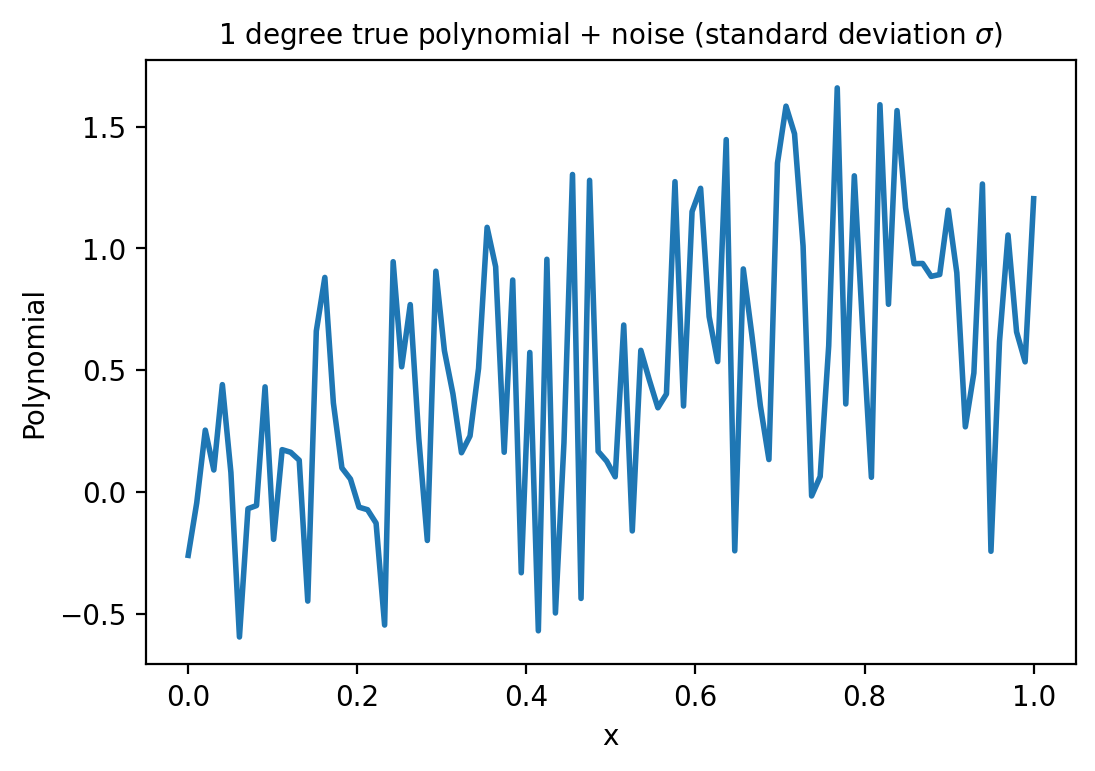

In [3]:
x = np.linspace(0,1,100) # x points to plot across
theta = np.array([0,1])  # Theta parameters
sigma = 0.5              # Noise sigma value

fig, ax = plt.subplots() # Create the plot
poly = polyModelWithNoise(x,theta,sigma) # Define the y+noise values
ax.plot(x,poly,linewidth=2) # Plot respective data
# Set axis labels
ax.set_title("1 degree true polynomial + noise (standard deviation $\sigma$)", fontsize=10);
ax.set_xlabel("x")
ax.set_ylabel("Polynomial")
print()

Defining the respective gradient function:

In [4]:
# Defining a function for the gradient of our polynomial, the
# theta parameter disappears when differentiating wrt. theta

def polyGradient(x,theta):
    # Set gradient as an empty list array
    grad = []
    
    for i in range(len(theta)):
    # Extract values to fill the list    
        grad.append(x**[i])
    
    return grad

grad = polyGradient(x,theta)

Now check that that the original function and the gradient function produce arrays of differing dimensions; 1D and 2D.

In [5]:
print(np.shape(poly))
print(np.shape(grad))

(100,)
(2, 100)


### Testing a 1st order polynomial:

Implementing a stochastic gradient descent algorithm to create a 1st order fitted polynomial for this 1st order true polynomial (+ noise):

In [6]:
numSteps = 100 # Number of steps for iteration

xpoints = np.linspace(0,1,100) # x region to plot over
theta_true = np.array([0,1])   # Theta true value
sigma = 0.5                    # Noise sigma value

theta = [-1,0.5] # Starting place
eta = 0.5        # Learning rate
thetaArray = np.zeros((numSteps+1,2)) # Array for plotting 
thetaArray[0] = theta

# Stochastic gradient descent iteration
for i in range(numSteps):
    # Sample 10 random x values between 0 and 1
    x = np.random.uniform(0,1,10)
    # Generate corresponding 'true' y values + noise
    y_true = polyModelWithNoise(x, theta_true, 0.5)
    # Generate y values for curve with fitted parameters
    y_model = polyModelWithNoise(x, theta, 0)
    # Deviation between 2 polynomials
    dev = polyModelWithNoise(x,theta, sigma)-polyModelWithNoise(x,theta_true,0)
    # Update the parameters
    theta-= eta*np.average(dev[None,:]*polyGradient(x,theta),axis=1)
    # Saving new parameters for subsequent iteration
    thetaArray[i+1] = theta

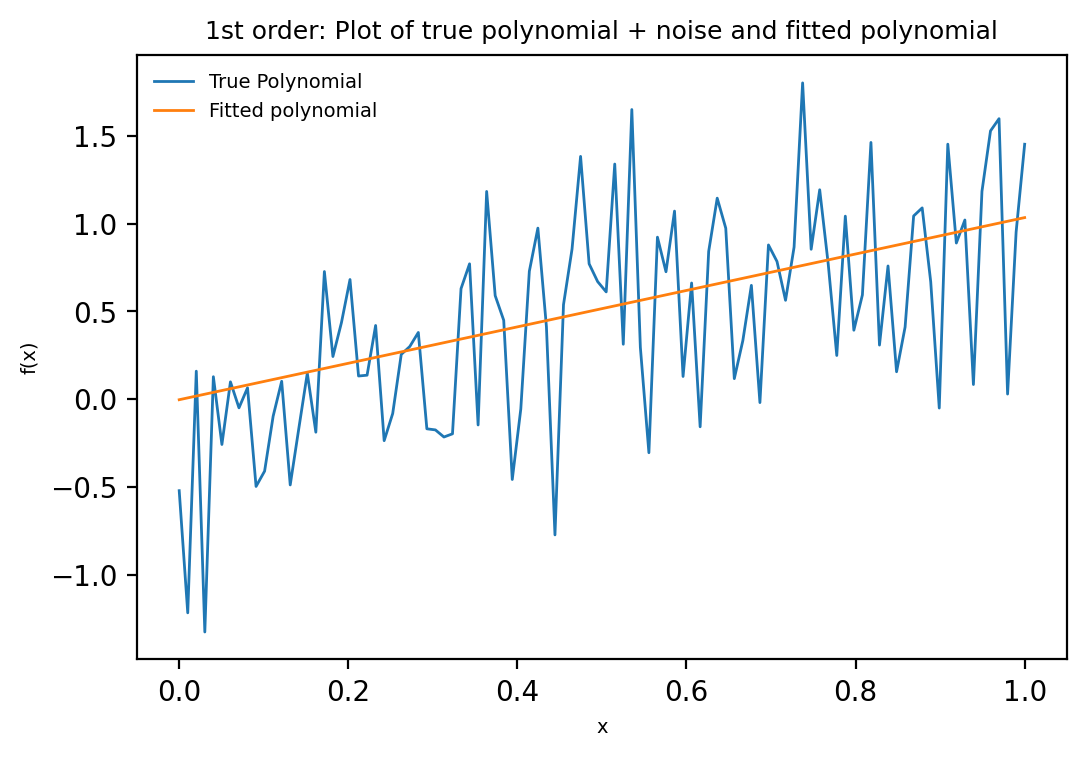

In [7]:
# Plotting 'true' and fitted polynomial
fig, ax = plt.subplots() # Get the fig and ax objects for the plot

# Fitted polynomial plot
ax.plot(xpoints,polyModelWithNoise(xpoints,theta,sigma),linewidth=1,label="True Polynomial")
ax.set_xlabel("x", fontsize=7)
ax.set_ylabel("f(x)", fontsize=7)

# 'True' polynomial plot
ax.plot(xpoints,polyModelWithNoise(xpoints,thetaArray[-1],0),linewidth=1, label="Fitted polynomial")
ax.legend(fontsize=7)
ax.set_title("1st order: Plot of true polynomial + noise and fitted polynomial", fontsize=9);

### Testing a 3rd order polynomial:

Polynomials of order: 1, 2, and 3 will be trained using a stochastic gradient algorithm within an iteration loop to calculate each of the 3 polynomials and fit them against a 3rd order true polynomial with noise, as opposed to the 1st order used before. We must randomly initialise values of theta. Taken from https://machinelearningmastery - 'The weights of artificial neural networks must be initialized to small random numbers. This is because this is an expectation of the stochastic optimization algorithm used to train the model, called stochastic gradient descent.'

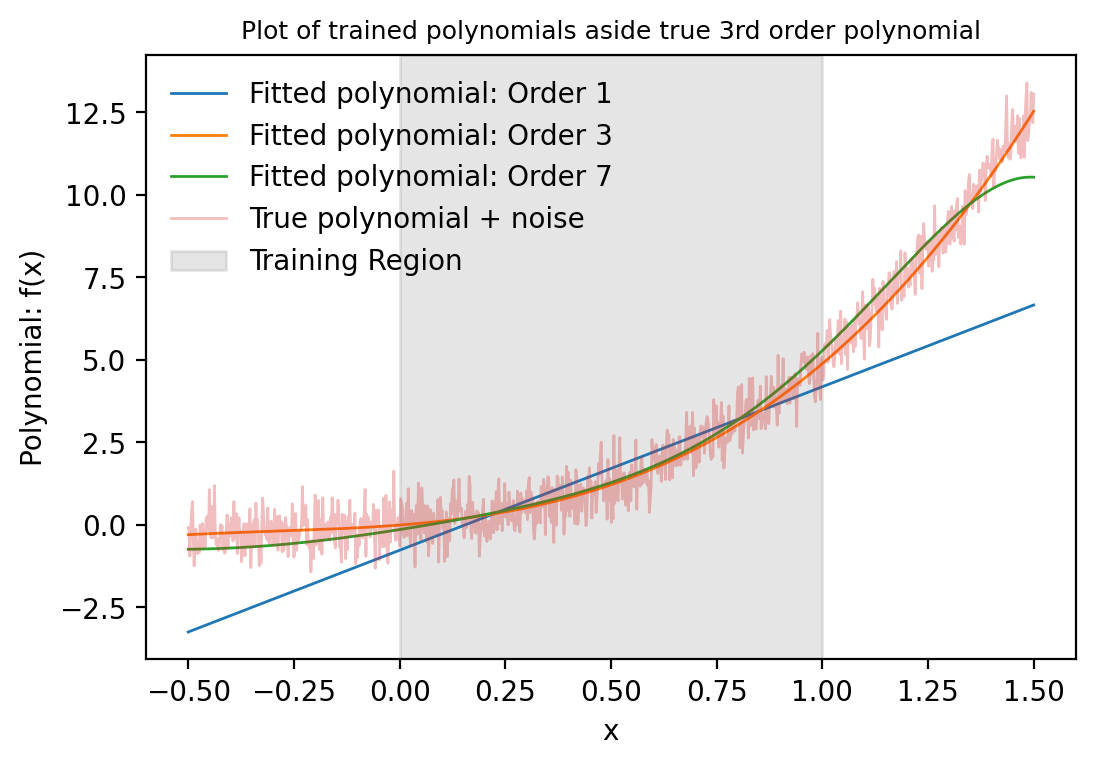

In [8]:
numSteps = 1000 #Number of steps for minimisation
theta_true = [0,1,2,2] # True value of theta
sigma = 0.5 # Sigma noise value
eta = 0.5   #'Learning' rate
xpoints = np.linspace(-0.5,1.5,1000) # x region to plot over
wMax = 2 # Set max. weight to initialise theta parameter

# Initialise theta parameters to obtain small random values

def initialise_theta(order, wMax):
    
    """Define theta as a vector with dimensions 'order+1' containing random  
    numbers between -wMax and wMax."""
    
    return np.random.uniform(low=-1*wMax, high=+1*wMax, size=order+1)

fig, ax = plt.subplots() # Get the fig and ax objects for the plot

# 1st loop: Iterate over the 3 polynomials to be fitted
for j in [1,3,7]:
    # Randomly initialise theta
    theta = initialise_theta(j, wMax)
    # Array for plotting 
    thetaArray = np.zeros((numSteps+1,j+1))
    # Initialise the parameter
    thetaArray[0] = theta

    # 2nd loop: Gradient descent iteration
    for i in range(numSteps):
        # Sample of 10 random x values between 0 and 1
        x = np.random.uniform(0,1,10)
        # Generate corresponding "true" y values (with noise)
        y_true = polyModelWithNoise(x, theta_true, 0.5)
        # Generate y values for curve with fitted parameters
        y_model = polyModelWithNoise(x, theta, 0)
        # Calculate deviation between polynomials
        dev = polyModelWithNoise(x,theta, sigma)-polyModelWithNoise(x,theta_true,0)
        # Update iterated parameters
        theta-= eta*np.average(dev[None,:]*polyGradient(x,theta),axis=1)
        # Save new parameters for subsequent iteration
        thetaArray[i+1] = theta
   
    # Create plot for trained polynomials
    ax.plot(xpoints,polyModelWithNoise(xpoints,theta,0),linewidth=1,label="Fitted polynomial: Order %i"%j)
    # Set axis labels
    ax.set_xlabel("x")
    ax.set_ylabel("Polynomial: f(x)")
    ax.set_title("Plot of trained polynomials aside true 3rd order polynomial", fontsize=9);
# Define the training region so it can be seen with clarity where the
# polynomials were trained over
ax.axvspan(0, 1, color='grey', alpha=0.2, label="Training Region")   
# Plot 'true' and fitted polynomials
ax.plot(xpoints,polyModelWithNoise(xpoints,theta_true,sigma),linewidth=1, label="True polynomial + noise", alpha=0.3)
ax.legend();

### Evaluation:

It can be seen from the plot that the 1st order trained fit does not posess the necessary degrees of freedom to accurately fit the 3rd degree true polynomial, which is axiomatic. It could be argued that within the training region, either the 7th or 3rd order polynomial may be the best fit for the true polynomial, depending on on the random generation of 'x' and initialisation of 'theta' (since the 'y' values correspond to the randomly generated 'x' values) i.e. running the code cell multiple times will lead to different conclusions about the most appropriate fit. Beyond the region of training, the 3rd degree fit will be the best generalisation to the regions of 'x' over which the polynomials were not trained. This is to be expected when being fitted to a 3rd order true polynomial since they possesses the same degrees of freedom and thus there isn't much opportunity for the 3rd degree fit to deviate beyond the boundaries of the training region. The 7th degree polynomial possesses too many degrees of freedom to remain accurate beyond these boundaries. On multiple runs of this code, inflection points / peaks might occur just outside the training region.

When being compared to a neural network for example, the number of degrees for the polynomial resembles the number of hidden layers in a neural network. The demands of the fit are thus too high for one layer (1st order), yet when the number of hidden layers / polynomial orders are sufficient, within the training region the 3rd and 7th order fits are almost perfect.